## Workflow
### Dataset > Data pre processing > Analysis > Train | Test > Random Forest Regressor > Evaluate

## Importing Dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# load the dataset to a pandas DataFrame
gold_dataset = pd.read_csv("ML_Project8_Gold.csv")

In [9]:
#print the first 5 rows
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
# print the number of rows and columns
gold_dataset.shape

(2290, 6)

In [13]:
# getting some basic info
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# getting some measures on the dataset
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
# checking for null values
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Checking Correlation
### Positive:  both increases
### Negative:  one value increases and other decreases

In [15]:
correlation = gold_dataset.corr()

<AxesSubplot:>

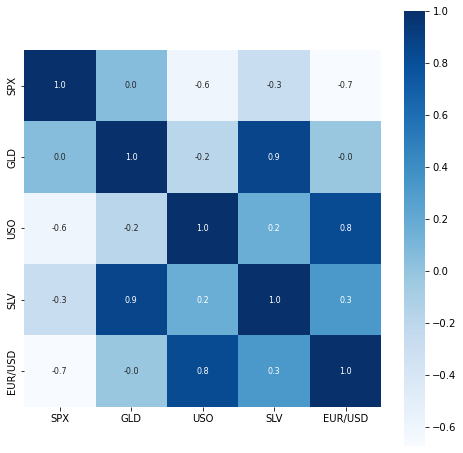

In [18]:
# creating a heatmap to understand the correlation between al columns
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues")

# GL and SLV are positivle correlated = if gold price increase, silver also does
# USO and SPX are negative correlate = if USO increases SPX decreases

In [19]:
# correlation values of GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

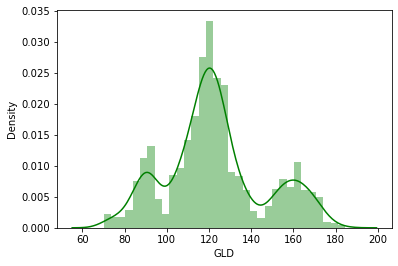

In [21]:
# check the distribtion of the gold price
sns.distplot(gold_dataset["GLD"],color="green")

## Splitting Features and Target

In [23]:
X = gold_dataset.drop(["Date","GLD"], axis=1)
y = gold_dataset["GLD"]

In [24]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [25]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

## Splitting train and test data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Model training: RandomForestRegressor


In [29]:
regressor = RandomForestRegressor()

In [30]:
# training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

## Model Evaltuation

In [31]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [32]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)

In [36]:
print(f"R squared eeror is : {error_score}")

R squared eeror is : 0.9889624073159349


## Compare Actual Values with Predicted values

In [37]:
y_test = list(y_test)

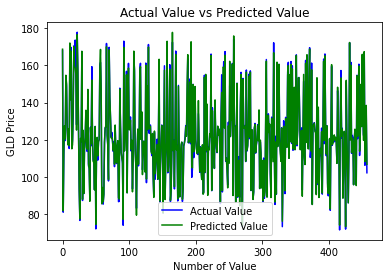

In [41]:
plt.plot(y_test, color="blue", label="Actual Value")
plt.plot(test_data_prediction, color="green", label="Predicted Value")
plt.title("Actual Value vs Predicted Value")
plt.xlabel("Number of Value")
plt.ylabel("GLD Price")
plt.legend()
plt.show()